In [17]:
#!rm -rf code
#!git clone https://xxxx/yyyy.git code
#!mv code/* .
%load_ext autoreload
%autoreload 2
%matplotlib inline
from helpers import *
from matplotlib import pyplot as plt
import numpy as np
from experiment_datasets import *
import pandas as pd
import seaborn as sns
import pickle
from IPython.display import clear_output
import matplotlib
from scipy.optimize import curve_fit

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Fixed single Boston experiment for all dataset as points

In [18]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

In [22]:
# pfailure for the first layer
p = 1e-2
np.random.seed(42)

In [24]:
repetitions = 5
Ns = np.arange(10, 1000, 100)
print('Total runs: %d' % (repetitions * len(Ns)))

Total runs: 50


In [25]:
def run_for_N(N = 50):
    """ Train a network with given h1 size and compute mean FT variance """
    K.clear_session()
    
    # run with random weights and multiple inputs
    exp = BostonHousingExperiment(N = [N, 49], p_inference = [0, p, 0, 0], seed = int(np.random.random() * 100000),
                                  activation = 'sigmoid', epochs = 200, do_print = 'plot',
                                  reg_coeff = 0, reg_type = 'l2')
    
    print('Loss: %s' % str(exp.get_mae_correct()))

    # obtaining data points
    data = exp.get_inputs(50)

    # obtaining errors and bounds for data points
    rmean, rstd = exp.run(data, repetitions = 10000)

    return np.mean(rstd['experiment'] ** 2)

In [ ]:
results = [[run_for_N(N) for _ in range(repetitions)] for N in tqdm(Ns)]

  0%|          | 0/10 [00:00<?, ?it/s]

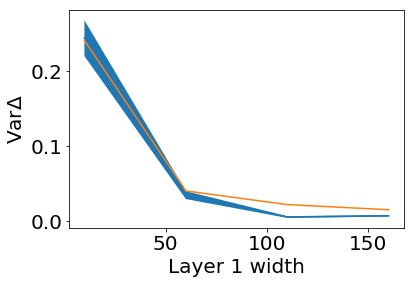

In [14]:
mean = np.mean(results, axis = 1)
std = np.std(results, axis = 1) / len(results[0])

def hyperbola(x, a):
    return 1. * a / x
hyperbola_coeff = curve_fit(hyperbola, Ns, mean)[0][0]

plt.figure()
plt.xlabel('Layer 1 width')
plt.ylabel('Var$\Delta$')
plt.plot(Ns, mean)
plt.plot(Ns, hyperbola_coeff / Ns)
plt.fill_between(Ns, mean - std, mean + std)
#plt.ylim(0,0.2)
plt.savefig('figures/comparison_architecture_boston.eps', bbox_inches = 'tight')
plt.show()

In [9]:
# fitting line to logarithmic plot
np.polyfit(np.log(Ns), np.log(mean), 1)

array([-1.38670474,  1.86176984])